In [0]:
# Kütühaneleri yükleme
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
#
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from matplotlib import pyplot 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import KFold 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import r2_score
#
from sklearn.metrics import classification_report 
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import accuracy_score 
#
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC
#
from sklearn.linear_model import Lasso 
from sklearn.linear_model import ElasticNet 
from sklearn.model_selection import GridSearchCV 
from sklearn.linear_model import LinearRegression 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.neighbors import KNeighborsRegressor 
from sklearn.svm import SVR 
#
from sklearn.ensemble import RandomForestRegressor 
from sklearn.ensemble import GradientBoostingRegressor 
from sklearn.ensemble import ExtraTreesRegressor 
from sklearn.ensemble import AdaBoostRegressor 
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline 
from sklearn.linear_model import LogisticRegression 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis 
from sklearn.naive_bayes import GaussianNB 
from sklearn.svm import SVC 
from sklearn.ensemble import AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import ExtraTreesClassifier
import warnings
warnings.filterwarnings("ignore")


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

##Prophet的运用
https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3

In [48]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(name=fn, length=len(uploaded[fn])))

Saving avocado.csv to avocado (1).csv
User uploaded file "avocado.csv" with length 1989197 bytes


In [49]:
# Update necessary packages first
!pip3 uninstall --yes fbprophet
!pip3 install fbprophet --no-cache-dir --no-binary :all:
!pip3 install pydotplus --no-cache-dir --no-binary :all:

Uninstalling fbprophet-0.6:
  Successfully uninstalled fbprophet-0.6
     |████████████████████████████████| 61kB 3.3MB/s 
Skipping wheel build for fbprophet, due to binaries being disabled for it.
    Running setup.py install for fbprophet ... done


In [0]:
# importing libraries
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import metrics
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import matplotlib
import warnings
warnings.filterwarnings("ignore") # Don't want to see the warnings in the notebook
from sklearn import svm

In [51]:
df=pd.read_csv("avocado.csv")
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [0]:
# PREPROCESSING

# drop unnamed column and rename undefined columns;

df = df.drop(['Unnamed: 0'], axis = 1)

df = df.rename(index=str, columns={"4046" : "Small Hass", "4225" : "Large Hass","4770" : "XLarge Hass" })

In [60]:
# convert Date column's format;

df['Date'] =pd.to_datetime(df.Date)

df.sort_values(by=['Date'], inplace=True, ascending=True)


df.head()

,Date,AveragePrice,Total Volume,Small Hass,Large Hass,XLarge Hass,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
11569,2015-01-04,1.75,27365.89,9307.34,3844.81,615.28,13598.46,13061.10,537.36,0.0,organic,2015,Southeast
9593,2015-01-04,1.49,17723.17,1189.35,15628.27,0.00,905.55,905.55,0.00,0.0,organic,2015,Chicago
10009,2015-01-04,1.68,2896.72,161.68,206.96,0.00,2528.08,2528.08,0.00,0.0,organic,2015,HarrisburgScranton
1819,2015-01-04,1.52,54956.80,3013.04,35456.88,1561.70,14925.18,11264.80,3660.38,0.0,conventional,2015,Pittsburgh
9333,2015-01-04,1.64,1505.12,1.27,1129.50,0.00,374.35,186.67,187.68,0.0,organic,2015,Boise


In [64]:
# TIME SERIES ANALYSIS

# Since the data itself is a time series data, I first want to see time series analysis predictions, and then apply ML models.

# Creating a two-column dataset to use in time series analysis;

df2 = df[['Date', 'AveragePrice']]
df2 = df2.set_index('Date')

weekly_df = df2.resample('W').mean()
w_df = weekly_df.reset_index().dropna()

w_df.sort_values(by=['Date'])
w_df.columns = ['ds', 'y']
w_df.head()


,ds,y
0,2015-01-04,1.301296
1,2015-01-11,1.370648
2,2015-01-18,1.391111
3,2015-01-25,1.397130
4,2015-02-01,1.247037


In [0]:
#To begin, we must instantiate a new Prophet object. Prophet enables us to specify a number of arguments.
#For example, we can specify the desired range of our uncertainty interval by setting the interval_width parameter.

from fbprophet import Prophet
my_model = Prophet(interval_width=0.95)

In [66]:
#Now that our Prophet model has been initialized, we can call its fit method with our DataFrame as input. The model fitting should take no longer than a few seconds.

my_model.fit(w_df)

INFO:fbprophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [67]:
#In order to obtain forecasts of our time series, we must provide Prophet with a new DataFrame containing a "ds" column that holds the dates for which we want predictions. 
#Conveniently, we do not have to concern ourselves with manually creating this DataFrame, as Prophet provides the make_future_dataframe helper function
future_dates = my_model.make_future_dataframe(periods=52, freq='W')
future_dates.tail()


,ds
216,2019-02-24
217,2019-03-03
218,2019-03-10
219,2019-03-17
220,2019-03-24


##预测的结果在yhat列

In [68]:
#The DataFrame of future dates is then used as input to the predict method of our fitted model.
#ds: the datestamp of the forecasted value
#【yhat: the forecasted value of our metric (in Statistics, yhat is a notation traditionally used to represent the predicted values of a value y)】
#yhat_lower: the lower bound of our forecasts
#yhat_upper: the upper bound of our forecasts



forecast = my_model.predict(future_dates)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
216,2019-02-24,1.239344,1.060474,1.410476
217,2019-03-03,1.255908,1.077522,1.436566
218,2019-03-10,1.254961,1.073159,1.432956
219,2019-03-17,1.251820,1.074547,1.438427
220,2019-03-24,1.262382,1.068550,1.456184


In [69]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2015-01-04,1.469909,1.225820,1.479375,1.469909,1.469909,-0.115557,-0.115557,-0.115557,-0.115557,-0.115557,-0.115557,0.0,0.0,0.0,1.354352
1,2015-01-11,1.466109,1.225695,1.498547,1.466109,1.466109,-0.104460,-0.104460,-0.104460,-0.104460,-0.104460,-0.104460,0.0,0.0,0.0,1.361649
2,2015-01-18,1.462310,1.229866,1.481028,1.462310,1.462310,-0.103788,-0.103788,-0.103788,-0.103788,-0.103788,-0.103788,0.0,0.0,0.0,1.358522
3,2015-01-25,1.458511,1.198374,1.456492,1.458511,1.458511,-0.124400,-0.124400,-0.124400,-0.124400,-0.124400,-0.124400,0.0,0.0,0.0,1.334111
4,2015-02-01,1.454712,1.176394,1.428150,1.454712,1.454712,-0.154656,-0.154656,-0.154656,-0.154656,-0.154656,-0.154656,0.0,0.0,0.0,1.300056
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216,2019-02-24,1.354813,1.060474,1.410476,1.232275,1.485741,-0.115469,-0.115469,-0.115469,-0.115469,-0.115469,-0.115469,0.0,0.0,0.0,1.239344
217,2019-03-03,1.352364,1.077522,1.436566,1.226598,1.487308,-0.096456,-0.096456,-0.096456,-0.096456,-0.096456,-0.096456,0.0,0.0,0.0,1.255908
218,2019-03-10,1.349915,1.073159,1.432956,1.220521,1.489978,-0.094953,-0.094953,-0.094953,-0.094953,-0.094953,-0.094953,0.0,0.0,0.0,1.254961
219,2019-03-17,1.347466,1.074547,1.438427,1.213803,1.491928,-0.095646,-0.095646,-0.095646,-0.095646,-0.095646,-0.095646,0.0,0.0,0.0,1.251820


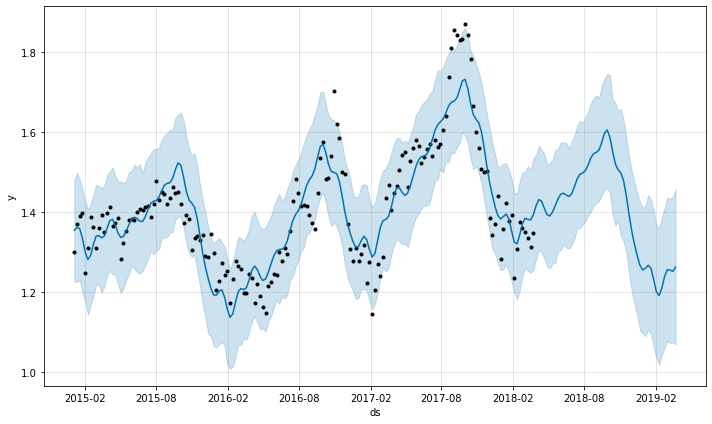

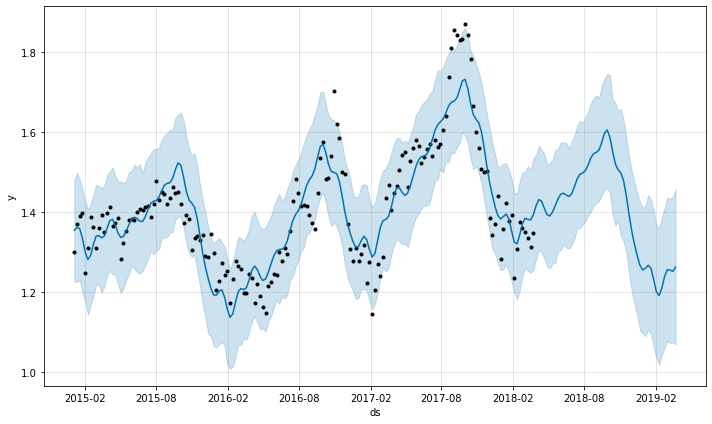

In [70]:
#Prophet also provides a convenient function to quickly plot the results of our forecasts:
my_model.plot(forecast,uncertainty=True)

## Performance of the model

In [0]:
#https://facebook.github.io/prophet/docs/diagnostics.html

In [0]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(my_model, initial = '730 days', period = '180 days', horizon = '365 days')
#df.cv <- cross_validation(m, initial = 730, period = 180, horizon = 365, units = 'days')

df_cv.tail()


INFO:fbprophet:Making 1 forecasts with cutoffs between 2017-03-25 00:00:00 and 2017-03-25 00:00:00


,ds,yhat,yhat_lower,yhat_upper,y,cutoff
48,2018-02-25,1.415566,1.298387,1.536762,1.359630,2017-03-25
49,2018-03-04,1.437906,1.322396,1.558513,1.350185,2017-03-25
50,2018-03-11,1.449148,1.317354,1.567512,1.335093,2017-03-25
51,2018-03-18,1.456764,1.330091,1.585078,1.313704,2017-03-25
52,2018-03-25,1.464393,1.340160,1.589680,1.346852,2017-03-25


In [0]:
from fbprophet.diagnostics import performance_metrics
df_p = performance_metrics(df_cv)
df_p.tail()

,horizon,mse,rmse,mae,mape,mdape,coverage
44,337 days,0.004299,0.065566,0.051317,0.039840,0.040143,0.8
45,344 days,0.005797,0.076135,0.065984,0.050768,0.041141,0.8
46,351 days,0.005337,0.073058,0.064053,0.047804,0.041141,1.0
47,358 days,0.008880,0.094234,0.082171,0.061555,0.064970,0.8
48,365 days,0.011623,0.107810,0.103663,0.077542,0.085429,0.8


In [0]:
np.mean(df_p['rmse'])

0.1384243300456607

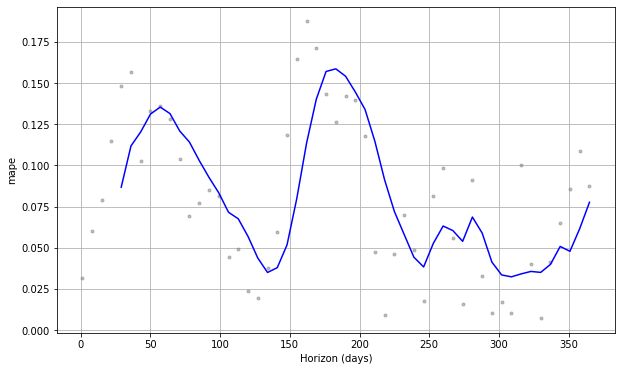

In [0]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')
# mean absolute percentage error MAPE 